### 1. Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score
)
from utils.utils import plot_confusion_matrix, generate_tensor

### 2. Loading the dataset

In [2]:
dataset = pd.read_csv('../dataset/dataset.csv')

### 3. Splitting training, validation and testing data

In [3]:
test_df = dataset.sample(frac=1.0, random_state=42)

In [4]:
test_data = generate_tensor(test_df, image_size=(227,227))

Found 480 validated image filenames belonging to 2 classes.


### 4. Loading the InceptionV3 model

In [5]:
model = tf.keras.models.load_model('./models/trained/inception_model.h5')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 113, 113, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 113, 113, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 113, 113, 32)         0         ['batch_normalization[0][0

### 5. Making predictions

In [6]:
y_pred = np.squeeze(model.predict(test_data) >= 0.5).astype(np.int32)

15/15 [==============================] - 24s 1s/step


In [7]:
x = f1_score(y_true=test_data.labels, y_pred=y_pred)
y = precision_score(y_true=test_data.labels, y_pred=y_pred)
z = recall_score(y_true=test_data.labels, y_pred=y_pred)

In [8]:
print(f'F1 Score: {round(x*100,2)}%')
print(f'Precision Score: {round(y*100,2)}%')
print(f'Recall Score: {round(z*100,2)}%')

F1 Score: 0.997920997920998
Precision Score: 0.995850622406639
Recall Score: 1.0


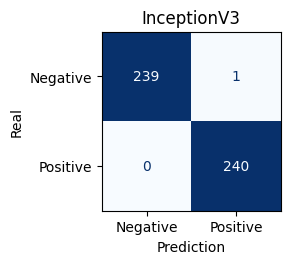

In [9]:
disp = plot_confusion_matrix(test_data.labels, y_pred, title = 'InceptionV3')

plt.show()

In [10]:
disp.figure_.savefig('./models/figures/inceptionv3/inceptionv3_confusion_matrix.eps')
disp.figure_.savefig('./models/figures/inceptionv3/inceptionv3_confusion_matrix.png')

### 6. Evaluating the model

In [11]:
loss, acc = model.evaluate(test_data)

15/15 [==============================] - 21s 1s/step - loss: 0.0173 - accuracy: 0.9979


In [12]:
print(f'acc: {round(acc*100,2)}%')
print(f'loss: {loss}' )

acc: 0.9979166388511658
loss: 0.017326153814792633
